<a href="https://colab.research.google.com/github/NisthaRaj/Data-Scientist101/blob/main/ARIMA_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**ARIMA stands for AutoRegressive Integrated Moving Average.** It is a class of models that captures a suite of different standard temporal structures in time series data. Before we apply ARIMA, we need to ensure that the series is stationary, which involves checking if its statistical properties such as mean, variance, and autocorrelation are constant over time.



In [2]:
# load the training dataset
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv
data = pd.read_csv('daily-total-female-births.csv')

--2025-07-24 11:17:45--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6220 (6.1K) [text/plain]
Saving to: ‘daily-total-female-births.csv.2’

daily-total-female- 100%[===================>]   6.07K  --.-KB/s    in 0s      

2025-07-24 11:17:45 (48.3 MB/s) - ‘daily-total-female-births.csv.2’ saved [6220/6220]



In [3]:
data.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


**Preliminary Analysis**

The plot helps us visualize the data and provides initial insights into its properties, like trends and seasonality.


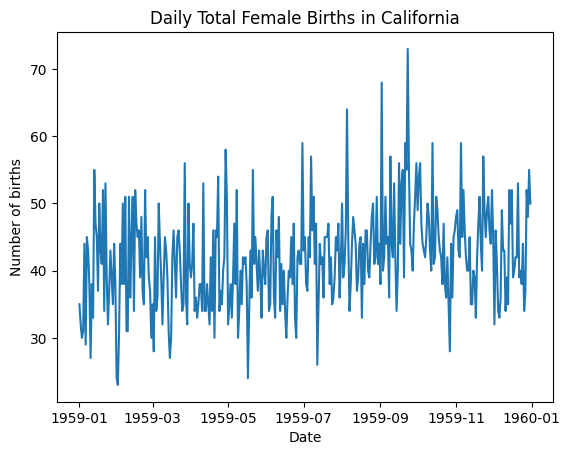

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('daily-total-female-births-CA.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
# Plot the time series
plt.plot(data['Births'])
plt.title('Daily Total Female Births in California')
plt.xlabel('Date')
plt.ylabel('Number of births')
plt.show()

**Testing for Stationarity:**
Next, we use the Augmented Dickey-Fuller (ADF) test to check for stationarity:

In [5]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['Births'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.808291
p-value: 0.000052


**Finding ARIMA Parameters:**

We use the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to find the ARIMA parameters.

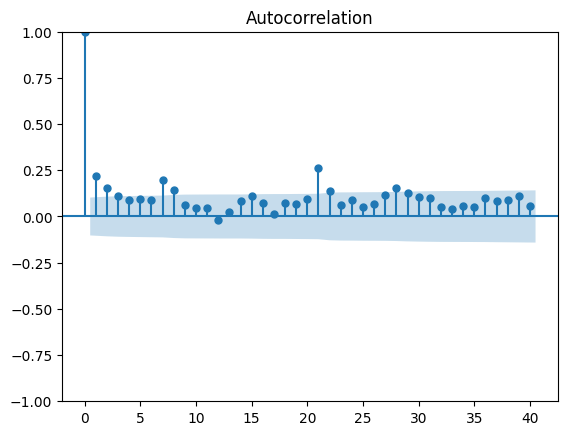

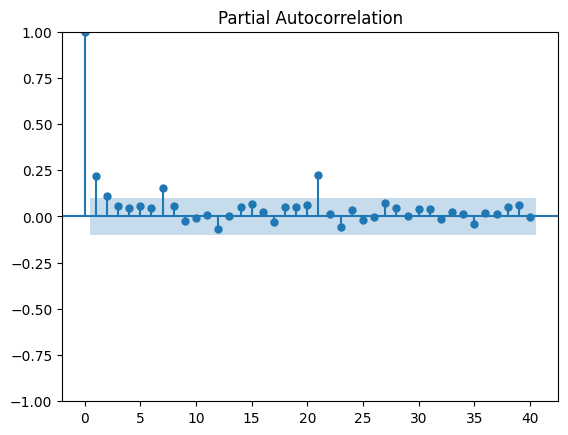

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Births'], lags=40)
plot_pacf(data['Births'], lags=40)
plt.show()

These plots suggest that an ARIMA(1, 0, 1) model may be a good starting point.



**Building the ARIMA Model**


In [7]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Births'], order=(1, 0, 1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


**Training and Forecasting**


We train the model on the data and perform a forecast.



In [8]:
forecast = model_fit.get_forecast(steps=30)


**Model Evaluation**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


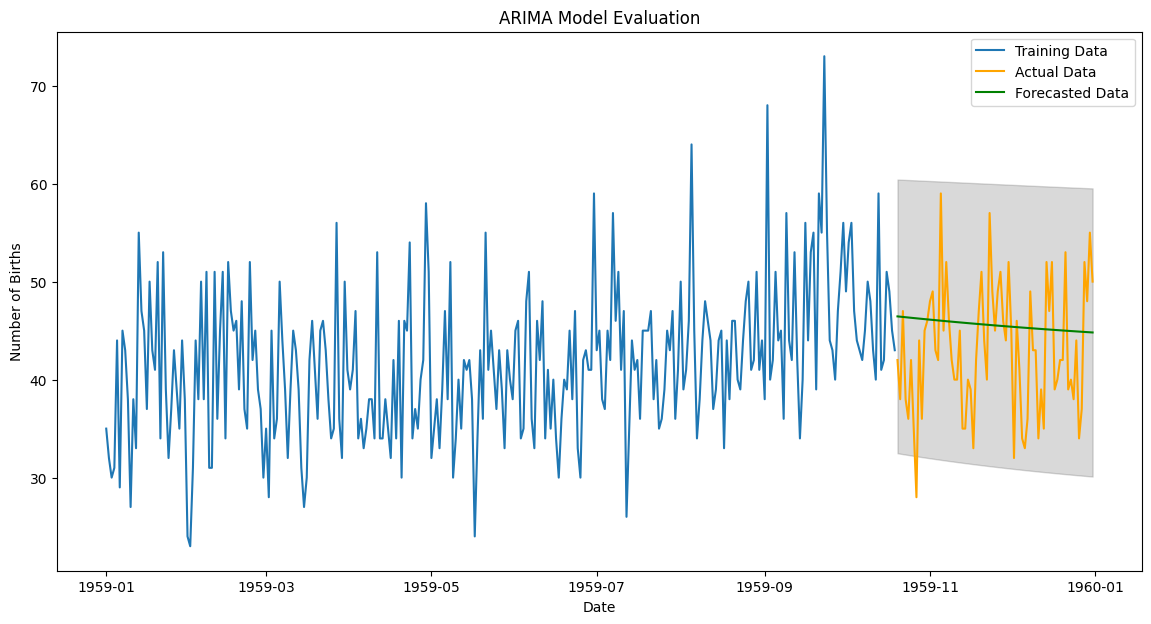

RMSE: 6.970853410651635


In [9]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['Births'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['Births'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['Births'], label='Training Data')
plt.plot(test['Births'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

print('RMSE:', rmse)


The retrospective forecast (backtest) compares the forecasted data against the actual data in the test set. The Root Mean Squared Error (RMSE) of the forecast is approximately 6.97 births.

The plot shows the training data, the actual values from the test set (in orange), and the forecasted values (in green), with the 95% confidence interval shown as the shaded area. The model appears to capture the central tendency of the series but does not capture any potential within-sample variability, which is not surprising given that ARIMA models are often more suited for data with trends or seasonality, which this series does not appear to exhibit.